<a href="https://colab.research.google.com/github/takumi3682/automatestuff-ja/blob/master/AMeDAS2%E5%9C%B0%E7%82%B9%E6%B0%97%E6%B8%A9%E6%AF%94%E8%BC%83_r3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
pip install -q japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# AMeDAS2地点比較_r3.ipynb
# 2地点の気温比較（季節比較）
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from tables.description import dtype_from_descr

In [4]:
def data_read(s_year, e_year, place):  # 日毎データを読み込む

  data = []
  for i in range(s_year, e_year+1):
    fn = fp + place + str(i) + '_d.csv'
    df = pd.read_csv(fn, encoding='UTF-8', skiprows=0, header=0, \
                  index_col='月日',parse_dates=True, \
                  usecols=['月日', '最高気温','最低気温','平均気温'])
    data.append(df)
  df = pd.concat(data, axis=0)
  return df

In [15]:
fp = '/content/drive/MyDrive/JMA_data/'
s_year = 2006
e_year = 2022
b_place = '蔵王'   # 基準になる地点
c_place = '亘理'
#c_place = input('比較地点： ')   # 比較する地点

df_b = data_read(s_year, e_year, b_place)
df_c = data_read(s_year, e_year, c_place)
df_diff = df_b - df_c   # 両地点の差

df_diff.index.to_pydatetime()
display('差分', df_diff)
print(df_diff.dtypes)

df_monthly =  df_diff.resample('D').mean()

display(df_monthly)

"""
display('最大値', df_diff.max())
display('最小値', df_diff.min())
display('平均値', df_diff.mean())
display('中央値', df_diff.median())
display('標準偏差', df_diff.std())
"""

count_positive = df_diff.resample('Y').apply(lambda x: (x > 0).sum())
count_equal = df_diff.resample('Y').apply(lambda x: (x == 0).sum())
count_negative = df_diff.resample('Y').apply(lambda x: (x < 0).sum())

count_positive['date'] = count_positive.index.to_pydatetime()
count_positive['year'] = count_positive['date'].dt.year
count_equal['date'] = count_equal.index.to_pydatetime()
count_equal['year'] = count_equal['date'].dt.year
count_negative['date'] = count_negative.index.to_pydatetime()
count_negative['year'] = count_negative['date'].dt.year

denominator_max = count_positive['最高気温'] + count_equal['最高気温']\
 + count_negative['最高気温']
denominator_mean = count_positive['平均気温'] + count_equal['平均気温']\
 + count_negative['平均気温']
denominator_min = count_positive['最低気温'] + count_equal['最低気温']\
 + count_negative['最低気温']

count_positive['最高気温_p'] = count_positive['最高気温']/denominator_max
count_positive['平均気温_p'] = count_positive['平均気温']/denominator_mean
count_positive['最低気温_p'] = count_positive['最低気温']/denominator_min

count_equal['最高気温_p'] = count_equal['最高気温']/denominator_max
count_equal['平均気温_p'] = count_equal['平均気温']/denominator_mean
count_equal['最低気温_p'] = count_equal['最低気温']/denominator_min

count_negative['最高気温_p'] = count_negative['最高気温']/denominator_max
count_negative['平均気温_p'] = count_negative['平均気温']/denominator_mean
count_negative['最低気温_p'] = count_negative['最低気温']/denominator_min

#display(count_positive)
#display(count_equal)
#display(count_negative)

'差分'

,平均気温,最高気温,最低気温
月日,,,
2006-01-01,-2.6,-1.4,-3.1
2006-01-02,-0.5,1.8,-1.5
2006-01-03,-1.4,-1.2,-1.1
2006-01-04,-0.8,-2.1,-0.4
2006-01-05,-1.2,-1.0,-0.1
...,...,...,...
2022-12-27,-2.4,-0.9,-2.3
2022-12-28,-2.1,-1.5,-4.5
2022-12-29,-0.8,-1.5,-0.1


平均気温    float64
最高気温    float64
最低気温    float64
dtype: object


,平均気温,最高気温,最低気温
月日,,,
2006-01-01,-2.6,-1.4,-3.1
2006-01-02,-0.5,1.8,-1.5
2006-01-03,-1.4,-1.2,-1.1
2006-01-04,-0.8,-2.1,-0.4
2006-01-05,-1.2,-1.0,-0.1
...,...,...,...
2022-12-27,-2.4,-0.9,-2.3
2022-12-28,-2.1,-1.5,-4.5
2022-12-29,-0.8,-1.5,-0.1


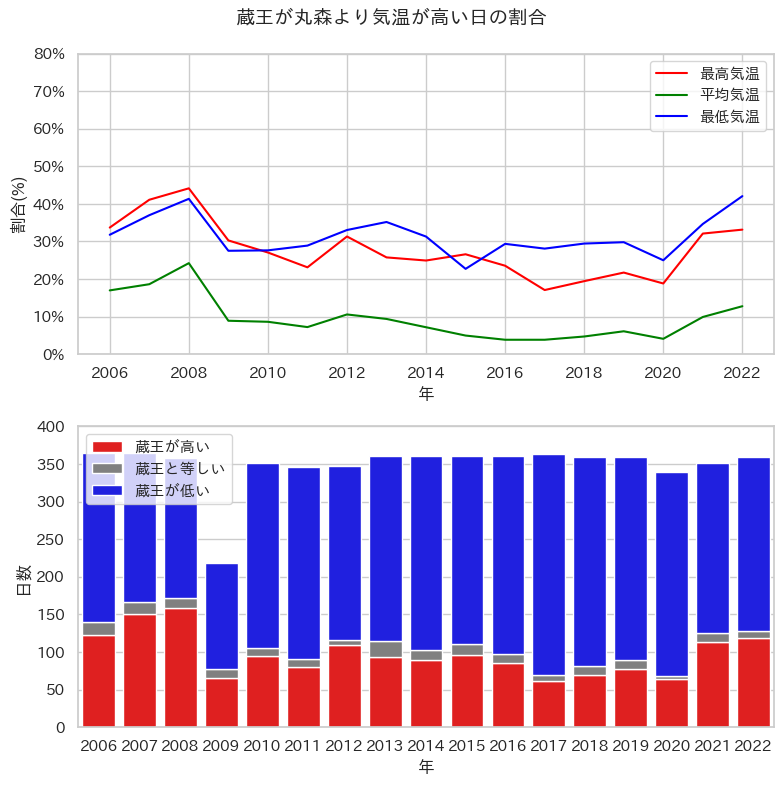

In [ ]:
fig = plt.figure(figsize=(8,8), tight_layout=True)
sns.set(style='whitegrid', context='notebook', font_scale=1.0, font='IPAexGothic')

ax1 = fig.add_subplot(2,1,1)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax1.set(xlabel='年', ylabel='割合(%)',ylim=[0,0.8])

sns.lineplot(data=count_positive, x='year', y='最高気温_p', \
             color='red', label='最高気温', ax=ax1)
sns.lineplot(data=count_positive, x='year', y='平均気温_p', \
             color='green', label='平均気温', ax=ax1)
sns.lineplot(data=count_positive, x='year', y='最低気温_p', \
             color='blue', label='最低気温', ax=ax1)
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
sns.barplot(data=count_positive, x='year', y='最高気温',\
            color='red', label=b_place+'が高い', ax=ax2)
sns.barplot(data=count_equal, x='year', y='最高気温',\
            color='gray', label=b_place+'と等しい', \
            bottom=count_positive['最高気温'], ax=ax2)
sns.barplot(data=count_negative, x='year', y='最高気温',\
            color='blue', label=b_place+'が低い', \
            bottom=count_positive['最高気温']+count_equal['最高気温'], ax=ax2)

ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set(xlabel='年', ylabel='日数', ylim=[0, 400])

plt.suptitle(b_place+'が'+c_place+'より気温が高い日の割合', fontsize=14)

#display('観測日数（分子）', count_positive['最高気温'], count_equal['最高気温'], count_negative['最高気温'])
ax2.legend()
plt.savefig(fp + '/output/' + b_place + '-' + c_place + '温度差_2.png')
plt.show()